# Further analysis of the problem

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import textwrap
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')


# Import data
data = pd.read_csv('result/final_analysis/merged_bac_age_filtered.csv')
data = data.set_index('SNP')
data.describe()


,CHR,FDR_BY,UNADJ,GC,BONF,HOLM,SIDAK_SS,SIDAK_SD,FDR_BH
count,70.000000,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01
mean,10.442857,2.613066e-03,1.390103e-06,1.428835e-06,1.168965e-01,1.159484e-01,inf,inf,2.192723e-04
std,6.614950,3.261146e-03,2.136338e-06,2.190973e-06,1.796510e-01,1.779784e-01,NaN,NaN,2.736557e-04
min,1.000000,4.420000e-42,1.323000e-47,4.016000e-48,1.113000e-42,1.113000e-42,8.703000e-13,8.691000e-13,3.709000e-43
25%,6.000000,6.683500e-05,5.064250e-09,1.095250e-08,4.259000e-04,4.252500e-04,6.549500e-04,6.543250e-04,5.608500e-06
50%,10.000000,8.063500e-04,1.312400e-07,1.639500e-07,1.103500e-02,1.095900e-02,1.774000e-02,1.763500e-02,6.767000e-05
75%,16.000000,4.285000e-03,2.191500e-06,2.292750e-06,1.843000e-01,1.833500e-01,1.785000e-01,1.776000e-01,3.595250e-04
max,20.000000,9.625000e-03,7.469000e-06,7.613000e-06,6.281000e-01,6.211000e-01,inf,inf,8.077000e-04


Box plot of the distribution of the bacteria of all kinds of refGene types.

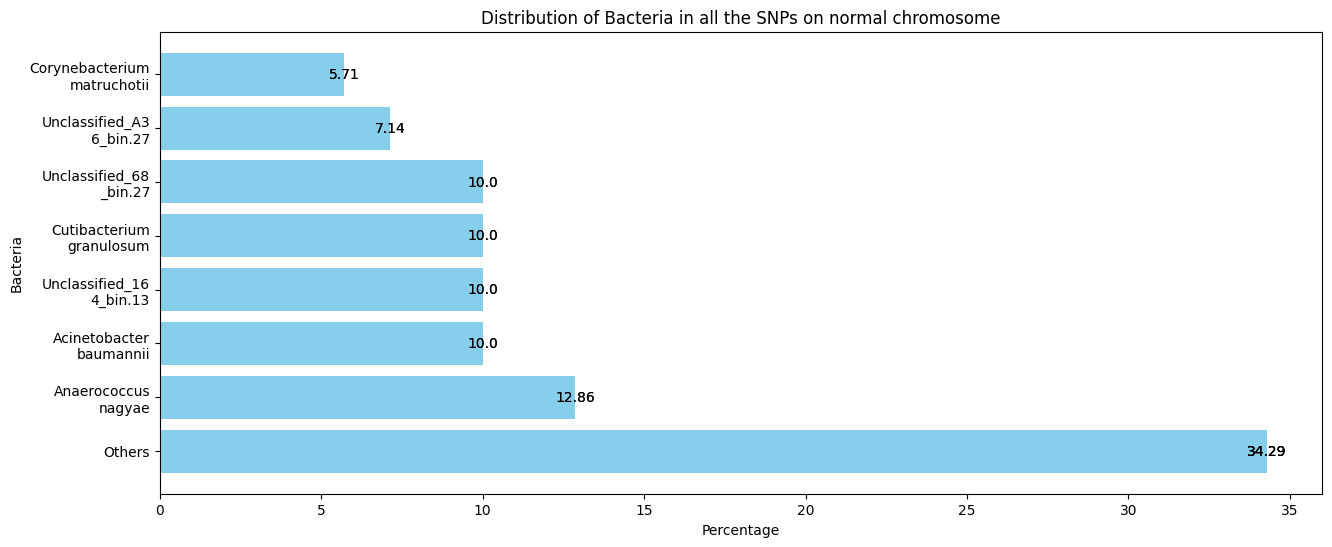

In [2]:
# Calculate the percentage of each bacteria
bacteria_data = data['Bacteria']
bacteria_percentage = bacteria_data.value_counts(normalize=True) * 100

# Group bacteria with percentage below 5% into 'Others'
bacteria_percentage['Others'] = bacteria_percentage[bacteria_percentage < 5].sum()
bacteria_percentage = pd.concat([bacteria_percentage[bacteria_percentage >= 5], pd.Series({'Others': bacteria_percentage['Others']})])
bacteria_percentage = bacteria_percentage.round(2)
bacteria_percentage = bacteria_percentage.sort_values(ascending=False)

# Plot with y-axis labels wrapped
plt.figure(figsize=(15, 6), dpi=100)
bars = plt.barh(bacteria_percentage.index, bacteria_percentage.values, color='skyblue')
plt.xlabel('Percentage')
plt.ylabel('Bacteria')
plt.title('Distribution of Bacteria in all the SNPs on normal chromosome')

# Wrap y-axis labels
for bar in bars:
  plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
       bar.get_width(), ha='center', va='center')
  label = bar.get_y() + bar.get_height()/2
  plt.text(bar.get_width(), label, bar.get_width(), ha='center', va='center')
  plt.gca().yaxis.set_tick_params(labelsize=10)
  labels = [textwrap.fill(label.get_text(), 15) for label in plt.gca().get_yticklabels()]
  plt.gca().set_yticklabels(labels)

plt.savefig('result/final_analysis/fig/bacteria_distribution_normal_all.pdf')
plt.show()


Pie chart of the distribution of the SNP refGene types.

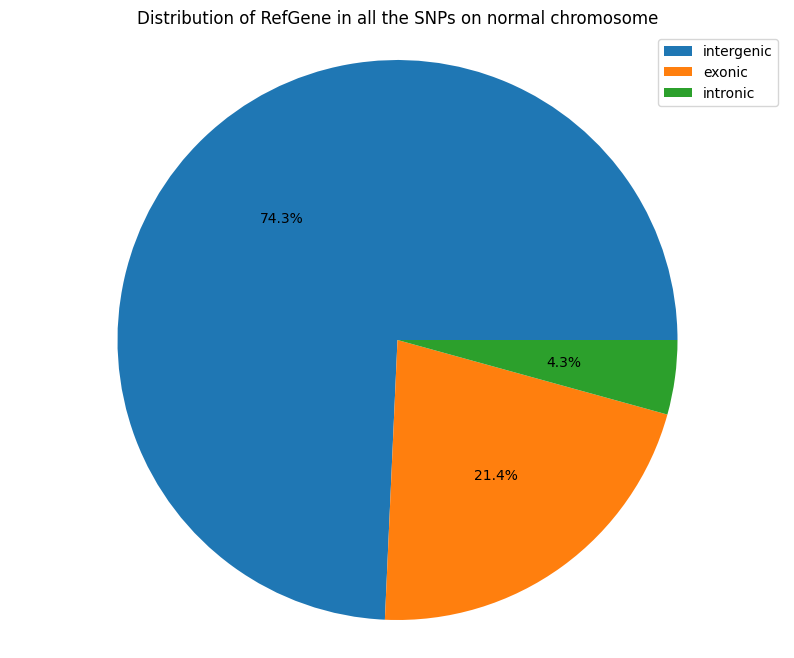

In [ ]:
# Calculate the percentage of each refGene type
refgene = data['Func.refGene']
refgene_percentage = refgene.value_counts(normalize=True) * 100
refgene_percentage = refgene_percentage.round(2)

# Plot with y-axis labels wrapped
plt.figure(figsize=(10, 8), dpi=100)
plt.pie(refgene_percentage, labels=None, autopct='%1.1f%%', startangle=0)
plt.legend(refgene_percentage.index, loc='upper right')
plt.title('Distribution of RefGene in all the SNPs on normal chromosome')
plt.axis('equal')


plt.savefig('result/final_analysis/fig/refgene_distribution_normal_all.pdf')
plt.show()


## To-do

